In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.offline as pyo
#pyo.init_notebook_mode()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
meter = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IS project/3_imputed_dataset/new_impute_linear.csv', index_col=['Time'], parse_dates=True)

weather = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IS project/3_imputed_dataset/impute_weather.csv', index_col=['Time'], parse_dates=True).drop('Unnamed: 0', axis=1)
datasets = pd.concat([weather, meter], axis=1)
datasets.head()

,pm10,pm2.5,temp,humid,female_1,female_2,female_3,female_4,female_6,female_8,male_3,male_4,male_5,bundit,csb2_pailom,dean_edu,food_indus,itsc_front,language,mechanical_2,old_art,rh_cmu,serve_techsci,test_animal
Time,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-07 00:15:00,NaN,NaN,NaN,NaN,6.85,6.65,NaN,NaN,6.810,6.65,5.31,8.9000,NaN,4.54,16.64,1.92,20.48,NaN,2.24,0.72,4.67,3.55,1.14,15.23
2020-02-07 00:30:00,NaN,NaN,NaN,NaN,6.98,6.92,NaN,NaN,6.500,6.60,4.99,7.9300,NaN,4.48,15.62,1.99,20.74,NaN,2.24,0.71,4.87,3.36,1.15,18.17
2020-02-07 00:45:00,NaN,NaN,NaN,NaN,7.81,6.27,5.76,NaN,6.005,6.11,4.87,8.3900,NaN,4.35,16.13,1.98,19.46,NaN,2.30,0.76,4.99,3.58,0.96,22.40
2020-02-07 01:00:00,NaN,NaN,NaN,NaN,6.91,6.33,4.87,4.55,5.510,5.73,4.73,7.9875,NaN,4.42,15.87,1.92,19.71,NaN,2.31,0.69,4.09,3.84,1.05,18.56


In [ ]:
datasets.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
pm10,53901.0,28.46,41.19,1.00,4.00,12.00,39.00,737.00
pm2.5,53901.0,24.77,37.17,1.00,4.00,10.00,33.00,701.00
temp,53901.0,30.80,2.61,15.00,29.00,31.00,32.00,39.00
humid,53901.0,50.70,12.93,11.00,42.00,53.00,61.00,78.00
female_1,53952.0,4.12,2.22,0.00,2.36,4.10,5.72,11.33
female_2,53952.0,3.64,1.77,0.32,2.12,3.46,4.99,9.47
female_3,53950.0,3.06,1.83,0.26,1.66,2.94,4.21,10.11
female_4,53949.0,3.87,2.06,0.00,1.86,4.16,5.38,9.79
female_6,53952.0,3.61,2.30,0.00,1.60,3.52,5.15,12.48
female_8,53952.0,4.93,2.70,0.00,2.91,5.06,6.91,12.86


# Plot heatmap every columns
### Why do you plot heatmap to explain the time series

In [ ]:
month_name = ["Feb 2020", "Mar 2020", "Apr 2020", "May 2020", "Jun 2020", "July 2020", "Aug 2020", "Sept 2020", "Oct 2020", "Nov 2020", "Dec 2020",
        "Jan. 2020", "Feb 2021", "Mar 2021", "Apr 2021", "May 2021", "Jun 2021", "July 2021", "Aug 2021"]

In [ ]:
def plot_heatmap(data):
    df = pd.DataFrame(data).copy()
    name = df.columns[0]
    df['day'] = [i.day for i in df.index]
    df['month'] = [i.month for i in df.index]
    df['year'] = [i.year for i in df.index]
    df['day_of_week'] = [i.dayofweek for i in df.index]
    df['hour'] = [i.hour for i in df.index]
    df_pivot1 = pd.pivot_table(df, values=name, index=['year','month'] , columns=['day'], aggfunc=np.mean).round(2)
    df_pivot1.index = month_name
    df_pivot2 = pd.pivot_table(df, values=name, index=['day_of_week'] , columns=['hour'], aggfunc=np.mean).round(2)
    df_pivot2.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']


    fig, axes = plt.subplots(2, 1, figsize=(25,20))
    sns.heatmap(df_pivot1, cmap='YlOrBr', robust=True, fmt='.2f', 
                  annot=True, linewidths=.5, annot_kws={'size':11}, ax=axes[0])
    sns.heatmap(df_pivot2, cmap='Blues', robust=True, fmt='.2f', 
                  annot=True, linewidths=.5, annot_kws={'size':11}, ax=axes[1])                       
    #ax.set_yticklabels(ax.get_yticklabels(),rotation=0, fontsize=10)
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
    plt.title(name, fontdict={'fontsize':18},    pad=14)
    plt.show()

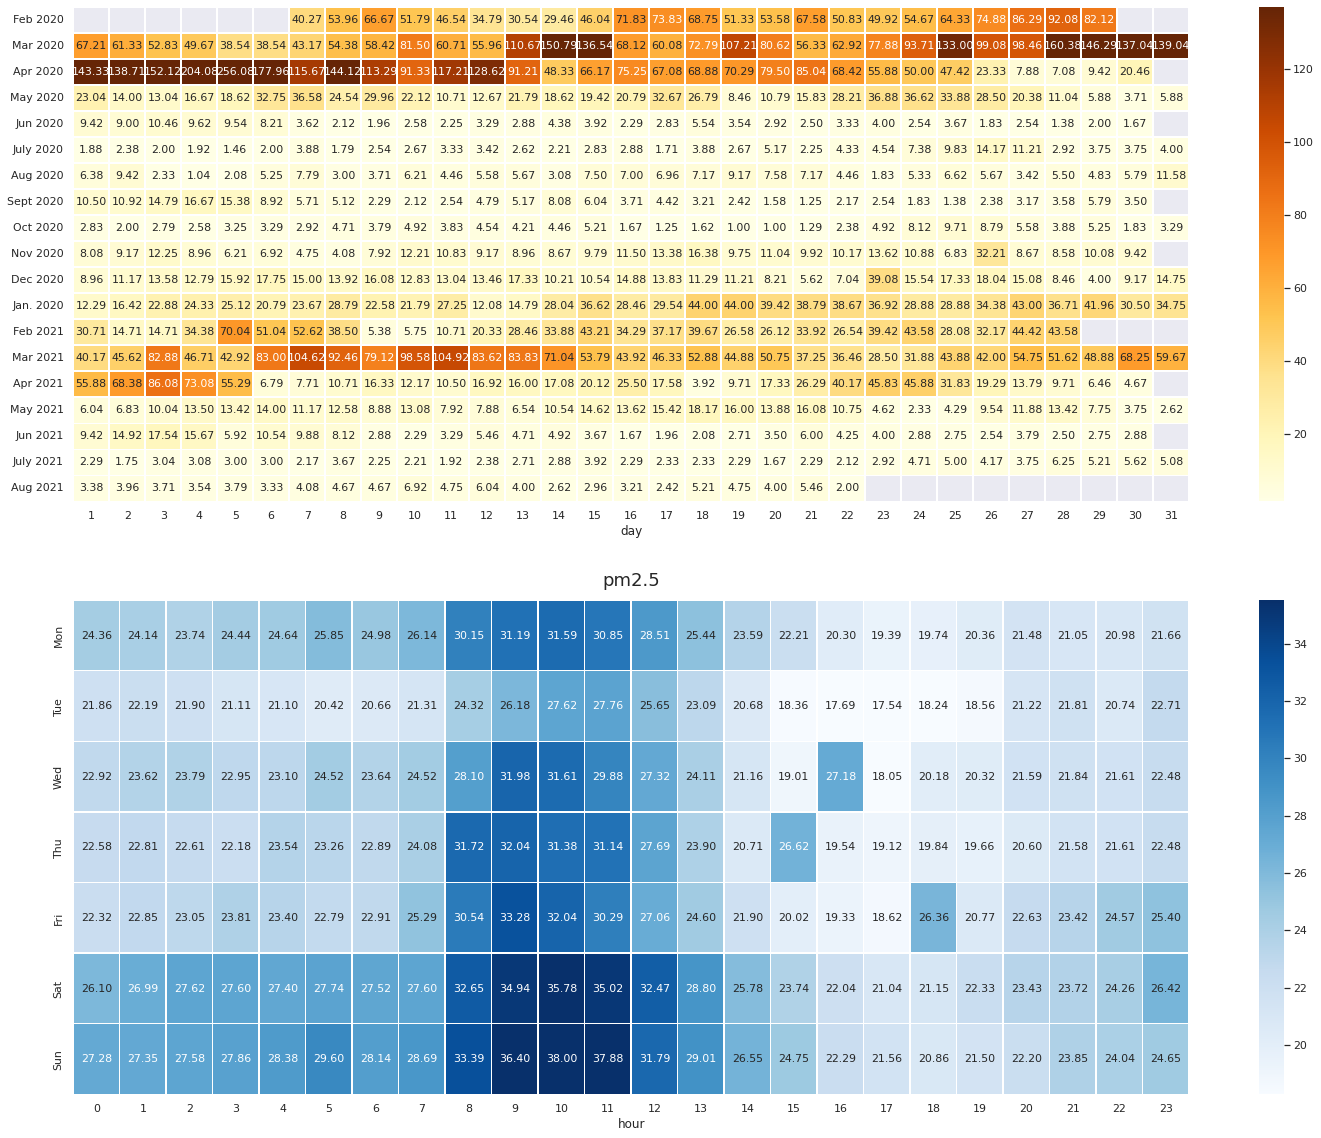

In [ ]:
# ตกแต่งเพิ่ม ชื่อแกน ชื่อกราฟ
plot_heatmap(datasets['pm2.5'])

# Line plot

In [ ]:
def daily_each_month(data, ylim=50):
    df = pd.DataFrame(data).copy()
    name = df.columns[0]
    df_hour = df.resample('1H').sum()
    df_hour['hour'] = [i.hour for i in df_hour.index]
    df_hour['day'] = [i.day for i in df_hour.index]
    df_hour['month'] = [i.month for i in df_hour.index]
    df_hour['year'] = [i.year for i in df_hour.index]

    fig, axes = plt.subplots(5, 4, figsize=(25, 20))
    rows, cols= 0 ,0
    i = 0
    month_name = ["Feb 2020", "Mar 2020", "Apr 2020", "May 2020", "Jun 2020", "July 2020", "Aug 2020", "Sept 2020", "Oct 2020", "Nov 2020", "Dec 2020",
            "Jan. 2020", "Feb 2021", "Mar 2021", "Apr 2021", "May 2021", "Jun 2021", "July 2021", "Aug 2021"]

    for _, df_group in df_hour.groupby(by=['year', 'month']):
        if cols == 4:
            rows += 1
            cols = 0
        else: pass
        sns.lineplot(data=df_group, x='hour', y=name, hue='day', ax=axes[rows,cols],legend=False, palette=[sns.color_palette()[0]]* len(df_group.day.unique()))
        axes[rows,cols].set_ylim(0,ylim)
        axes[rows,cols].set_title(month_name[i], fontsize=15,weight ='bold')
        axes[rows,cols].set_ylabel('Energy Consumption (kWh)', fontsize=10)
        axes[rows,cols].set_xlabel('Hour', fontsize=10)
        #axes[rows,cols].set_xticklabels(['0','10','15','20','24'])
        cols += 1
        i += 1
    axes[4,3].axis('off')
    fig.tight_layout()
    fig.suptitle('Daily Energy Consumption of '+ name +' for Each month', size=25, y=1.025, fontweight ='bold')
    fig.show()

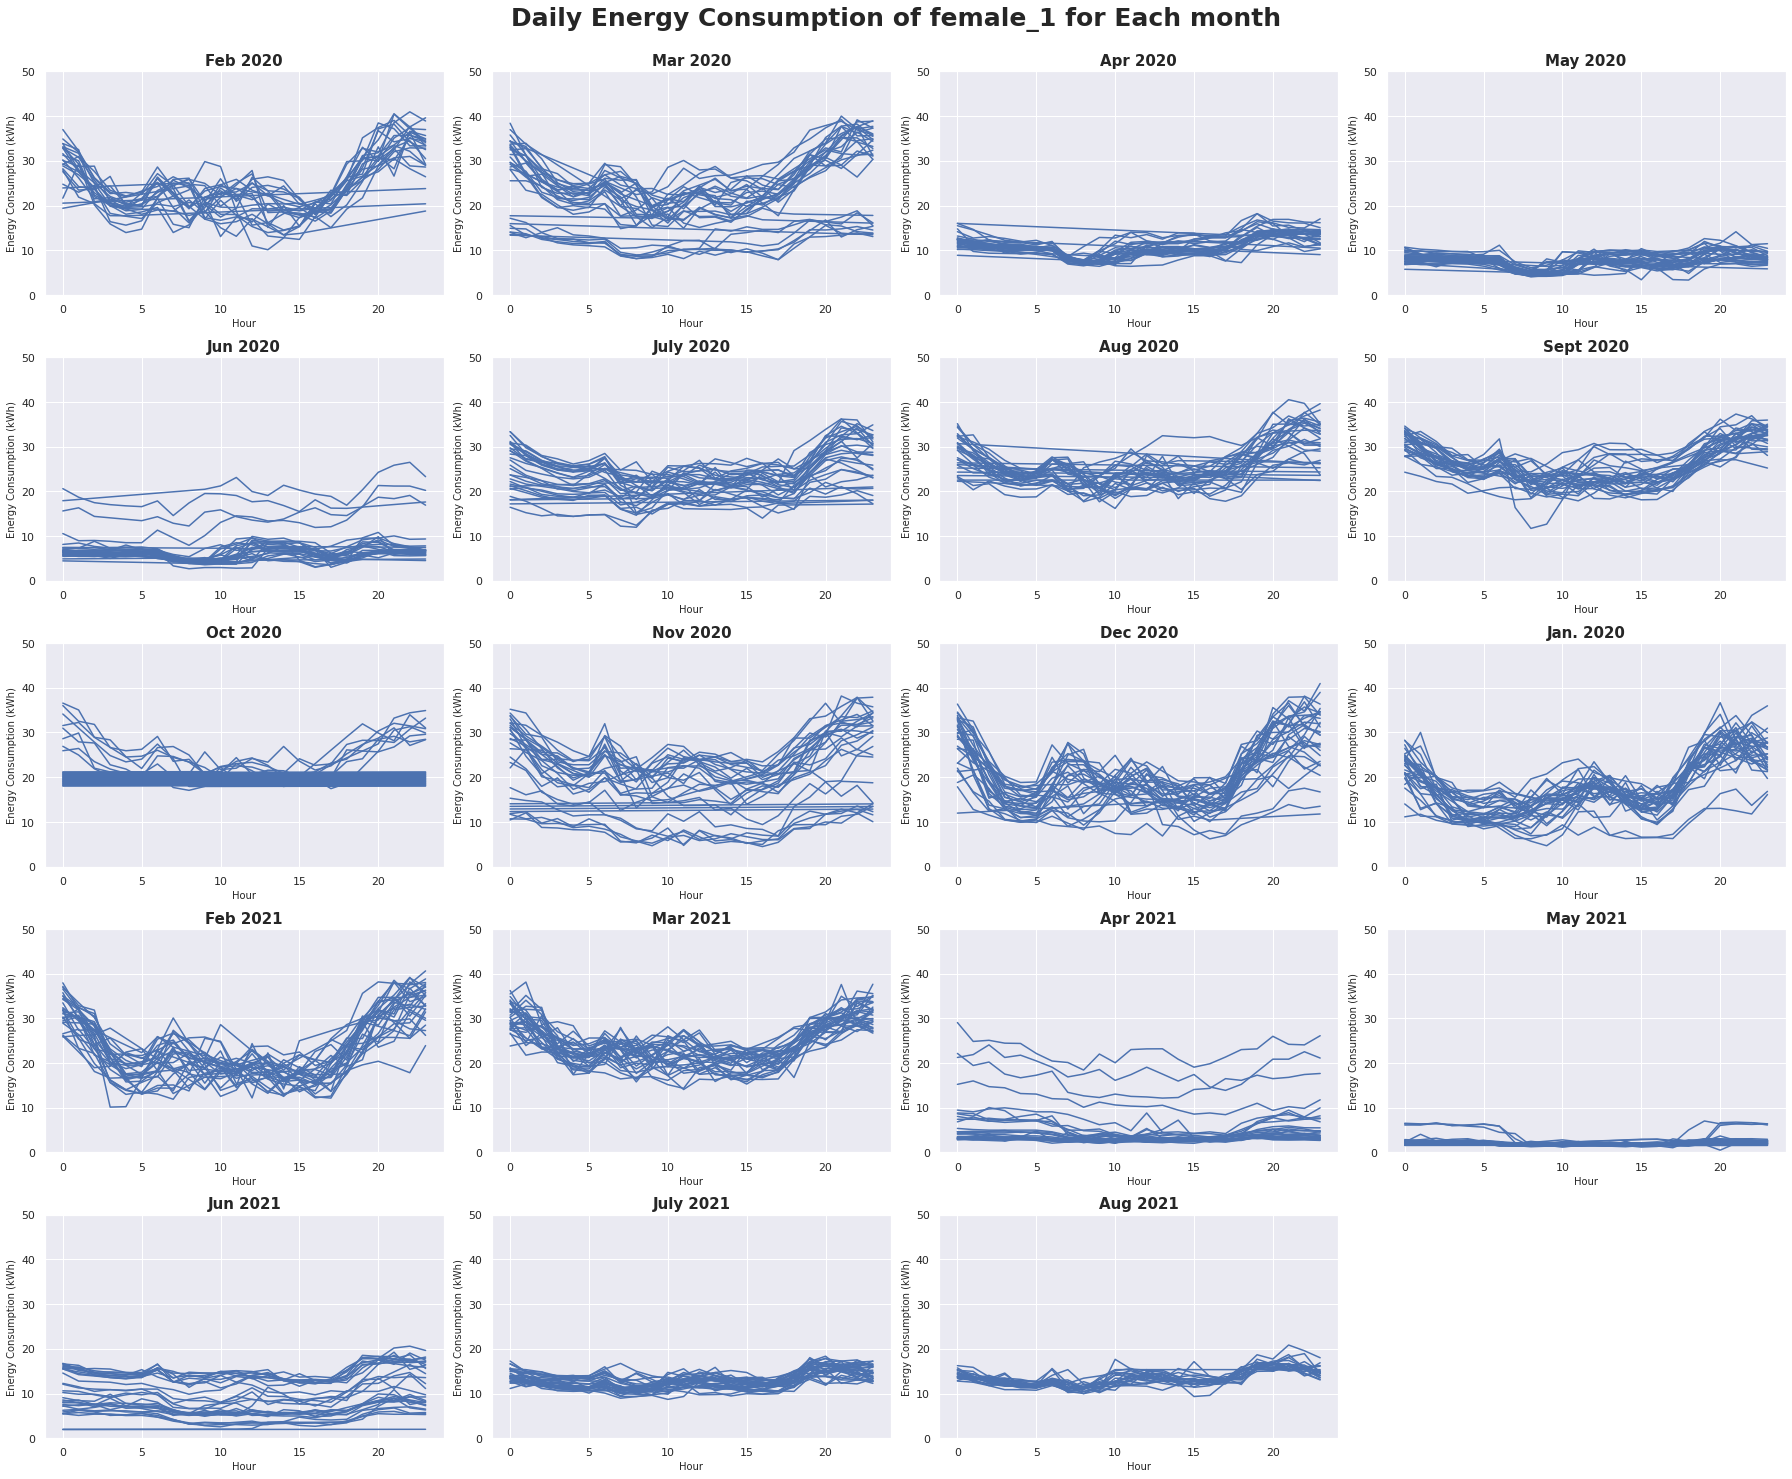

In [ ]:
daily_each_month(meter['female_1'])

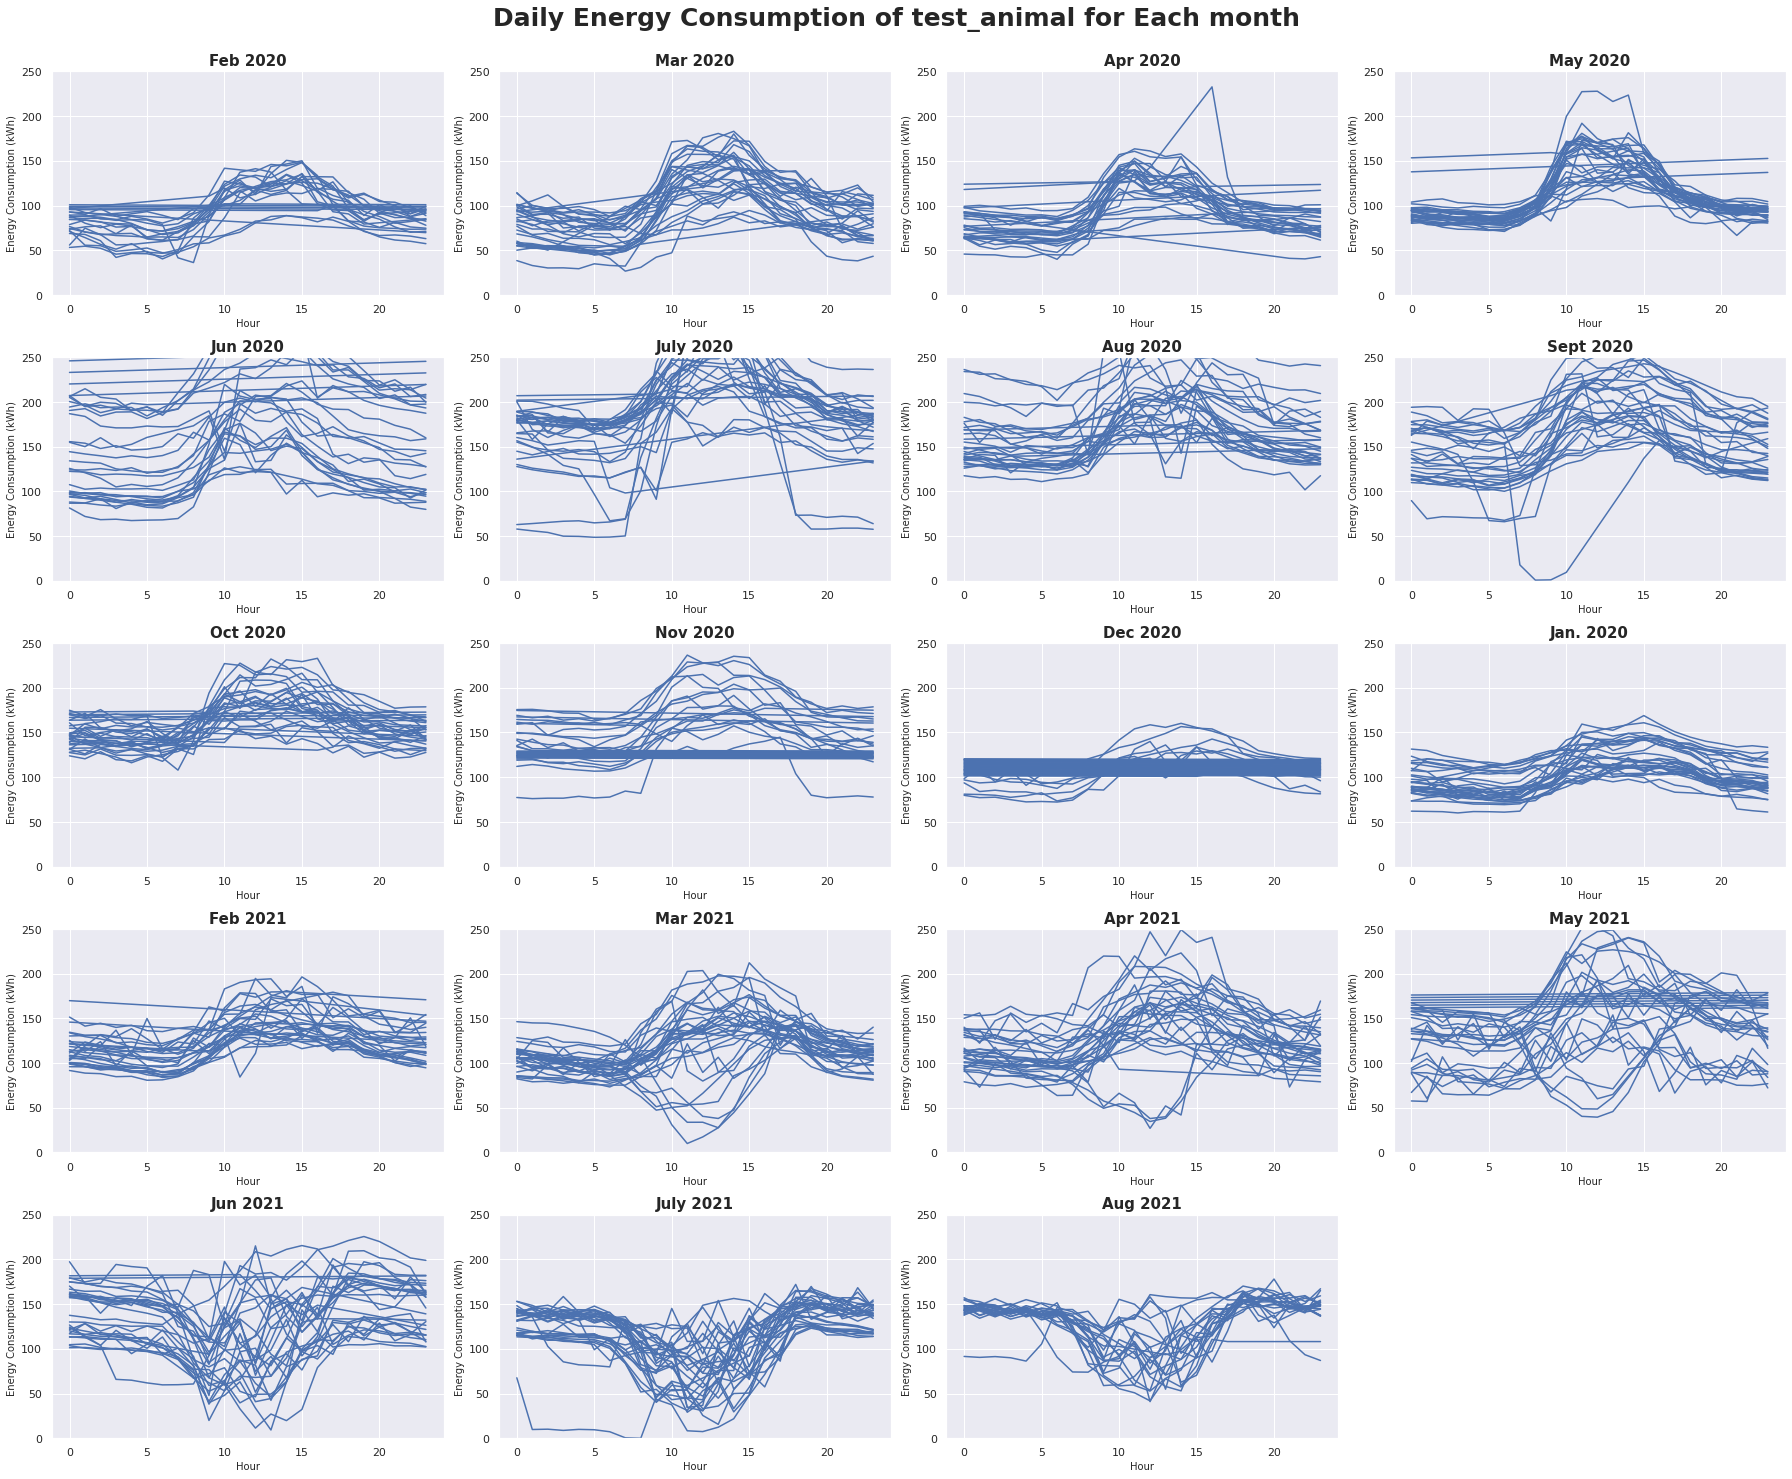

In [ ]:
daily_each_month(meter['test_animal'], 250)

In [ ]:
data = datasets.iloc[:, 4:].copy()
df = data.copy()
plots=[]
for col in df.columns:
    if col in ['female_1', 'female_2', 'female_3', 'female_4', 'female_6', 'female_8','male_3', 'male_4', 'male_5']:
        colors= 'orange'
    else: 
        colors = 'rgb(76,114,176)'

    building = pd.DataFrame(df[col]).copy()
    name = building.columns[0]
    df_hour = building.resample('4H').mean().rename({col: '1H_Avg'}, axis='columns')
    df_hour['1H_std'] = building.resample('4H').std()
    df_hour = df_hour.rolling(96).mean()
    plots.append(go.Scatter(
        name=col,
        x=df_hour.index,
        y=df_hour['1H_Avg'],
        mode='lines',
        line=dict(color=colors)
    ))
    plots.append(go.Scatter(
        name='Upper Bound',
        x=df_hour.index,
        y=df_hour['1H_Avg']+df_hour['1H_std'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=0),
        showlegend=False,
        hoverinfo='none'
    ))
    plots.append(go.Scatter(
        name='Lower Bound',
        x=df_hour.index,
        y=df_hour['1H_Avg']-df_hour['1H_std'],
        marker=dict(color="#444"),
        line=dict(width=0),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.10)',
        fill='tonexty',
        showlegend=False,
        hoverinfo='none'
    ))

fig = go.Figure(plots)
fig.update_layout(
    yaxis_title='Energy Consumption (kWh)',
    title='20 Builidings (Dormitry VS Office)',
    #hovermode="x"
)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# office มีการใช้ไฟที่สมากกว่า โดยนัยยะ

In [ ]:
# Seasonal and Semetorเทอม ==> 

# Correlation
- self correlation(ACF, PACF)
- cross correlation (cross correlation, mutual information)

https://towardsdatascience.com/computing-cross-correlation-between-geophysical-time-series-488642be7bf0

https://medium.com/swlh/a-deep-conceptual-guide-to-mutual-information-a5021031fad0

### Correlation is Not Causation 
https://towardsdatascience.com/correlation-is-not-causation-ae05d03c1f53

In [ ]:
def corr_hearmap(df):
    corr_df = df.copy()
    # Get only half portion of corr_df to avoid df, so create mask    
    mask = np.triu(np.ones_like(corr_df), k=1)

    # plot a heatmap of the values
    plt.figure(figsize=(20,14))
    ax = sns.heatmap(corr_df, vmin=-1, vmax=1, cbar=False,
                     cmap='BrBG', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.15 < t < 0.15:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(size='x-large')
    plt.yticks(rotation=0, size='x-large')
    #Save fig uncomment first
    #plt.savefig("Heatmap DF")
    plt.show()

In [ ]:
# Time lagged cross correlation
def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 

    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))

In [ ]:
total_corr= dict()
for weather in datasets.iloc[:,:4].columns:
    each_weather = []
    datax = datasets[weather]
    for meter in datasets.iloc[:, 4:].columns:
        datay = datasets[meter]
        each_building = [crosscorr(datax, datay, lag=i) for i in range(-16,17)]
        each_weather.append(each_building)
    total_corr[weather] = pd.DataFrame(each_weather, columns=np.arange(-16,17), index=datasets.iloc[:, 4:].columns)

In [ ]:
def cross_corr_hearmap(df):
    corr_df = df.copy()
    # Get only half portion of corr_df to avoid df, so create mask    

    # plot a heatmap of the values
    plt.figure(figsize=(25,20))
    ax = sns.heatmap(corr_df, vmin=-1, vmax=1, cbar=False,
                     cmap=sns.color_palette("coolwarm", as_cmap=True),annot=True, linewidth=0.3)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.15 < t < 0.15:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(size='x-large')
    plt.yticks(rotation=0, size='x-large')
    #Save fig uncomment first
    #plt.savefig("Heatmap DF")
    plt.show()

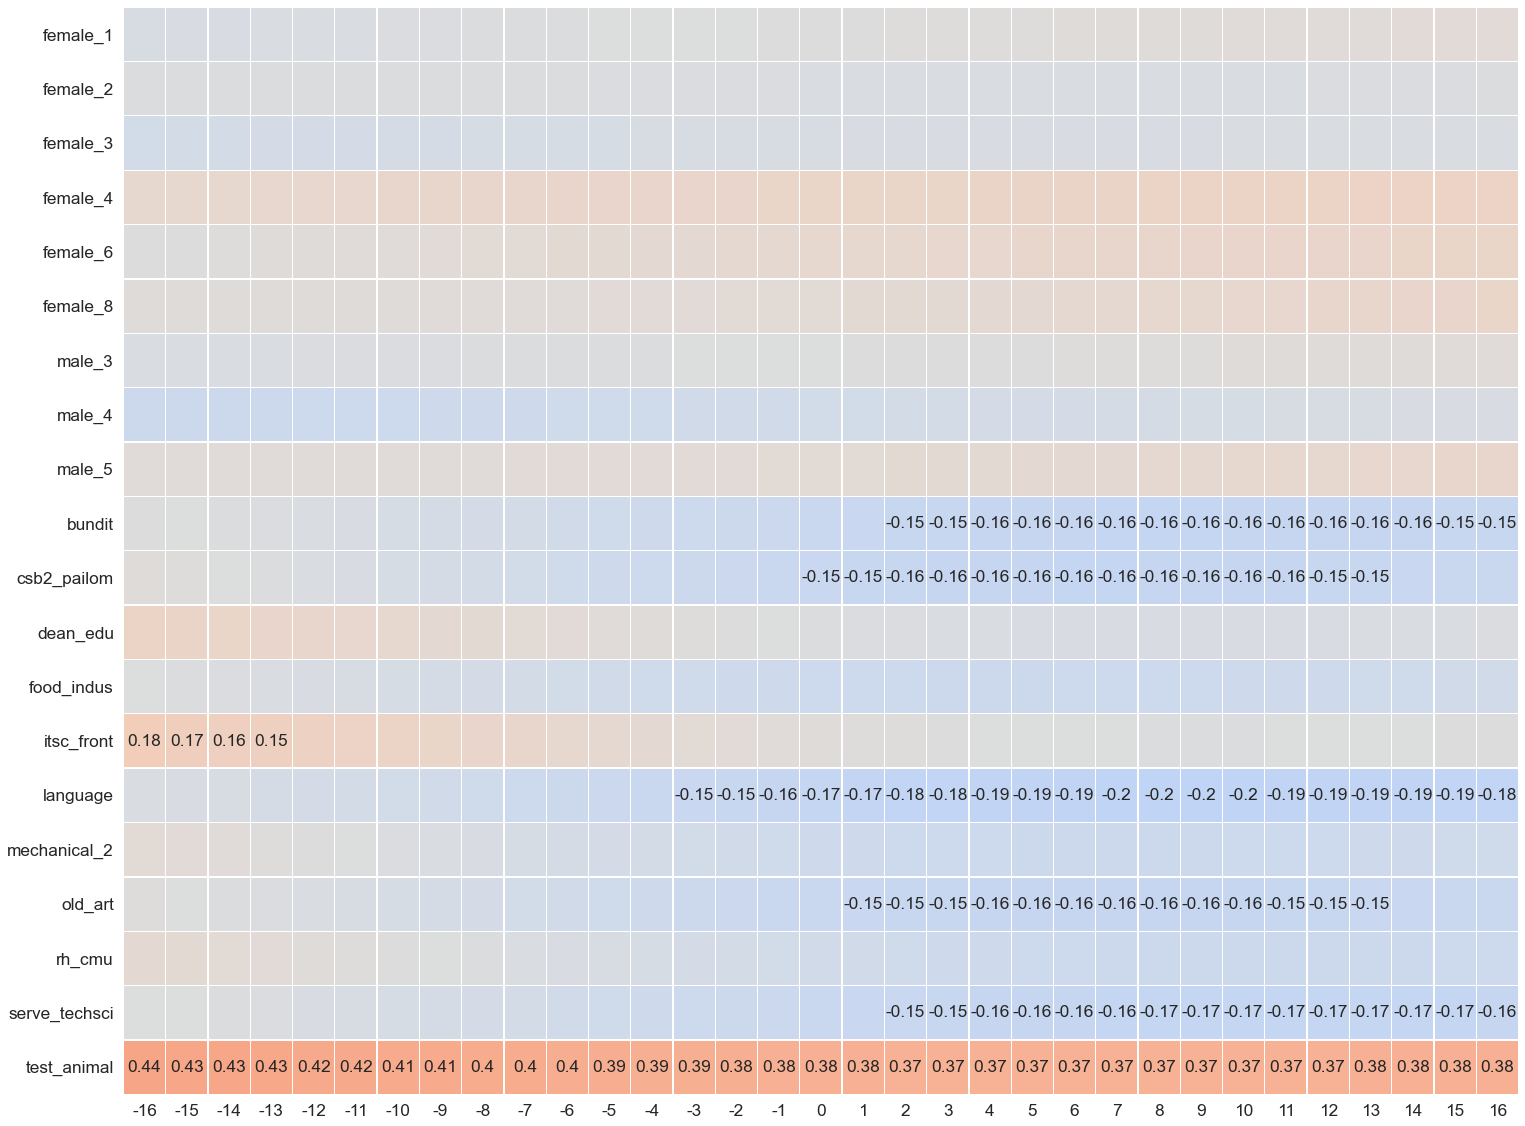

In [ ]:
cross_corr_hearmap(total_corr['humid'])

In [ ]:
# Humid ==> Air condition

# test_animal has positive corr why?